# *Heart Disease Predicition Notebook* ##

## Importing the necessary libraries

In [367]:
#Libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

#Necessary functions 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Metrics and Evaluation Methods
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix 

## *Data Preprocessing*

In [368]:
#First, let's import our dataset.
df = pd.read_csv(r"C:\Users\ramam\Desktop\heart_disease_dataset.csv")
df.head(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [369]:
df.shape
#The dataset has 15 features and 1000 observations. 

(1000, 16)

In [370]:
#Checking the datatypes of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [371]:
#Descriptive statictics of the data
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [372]:
#Identifying duplicates
df[df.duplicated()]

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease


There are no duplicated rows!

In [373]:
#Checking for special characters or trail spaces in the dataset
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts(), '\n')

Value counts for column: Age
Age
37    31
49    28
76    26
48    26
26    26
59    23
51    23
64    22
42    22
69    21
70    21
63    21
66    21
46    21
41    20
68    20
75    20
27    20
54    20
61    19
58    18
40    18
36    18
55    18
62    18
53    18
52    17
50    17
71    17
25    17
73    17
28    17
74    17
79    17
43    16
44    16
78    16
34    16
35    16
72    16
32    15
56    15
77    15
67    15
45    15
38    15
33    14
65    14
39    14
31    14
47    14
60    13
30    12
57    12
29    12
Name: count, dtype: int64 

Value counts for column: Gender
Gender
Female    503
Male      497
Name: count, dtype: int64 

Value counts for column: Cholesterol
Cholesterol
328    16
198    11
168    10
231    10
333    10
       ..
173     1
335     1
263     1
172     1
170     1
Name: count, Length: 200, dtype: int64 

Value counts for column: Blood Pressure
Blood Pressure
139    20
144    19
117    18
148    18
178    17
       ..
118     6
173     6
92      4
123 

There are no mistakes in the data or any extra incorrect values!

In [374]:
#Let's check for missing values
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

The column 'Alcohol Intake' has 340 missing values.

In [375]:
#Investigating the column 'Alochol Intake'
df['Alcohol Intake'].value_counts()

Alcohol Intake
Heavy       346
Moderate    314
Name: count, dtype: int64

We can see that there are 340 null values in the column which makes up 34% of the values! This percentage of missing values is huge so we cannot drop any rows. 

The values we do have are 'Moderate' and 'Heavy' which indicates the other values possibly could be light or no alcohol intake at all. This is what I will be filling the missing values with.

In [376]:
#Filling the missing values
df.fillna('Light/none', inplace=True)

In [377]:
#Checking that the values were filled
df.isnull().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

In [378]:
#The preprocessing step is done! Let's explore insights from our dataset. 
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Light/none,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Light/none,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Light/none,6,No,Yes,No,2,183,Yes,Asymptomatic,0


# *Exploratory Data Analysis* 

#### Let's start exploring!

In [379]:
#First I want to see the ages of people we have in our dataset.
print('Youngest age: ', min(df.Age))
print('Oldest age: ', max(df.Age))

Youngest age:  25
Oldest age:  79


The age range in this dataset is fairly diverse which could help us in a fair analysis!

Target eClass Distribution: Heart Disease
0    608
1    392
Name: count, dtype: int64


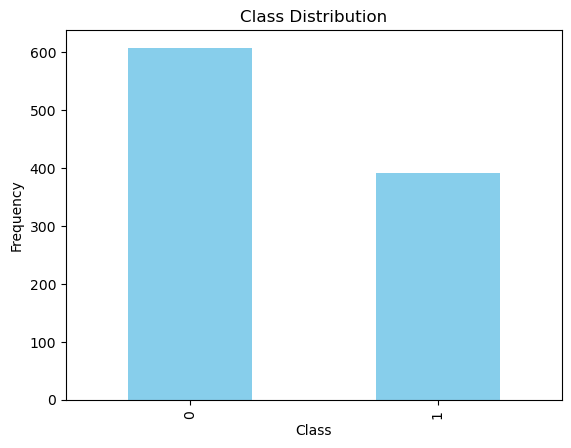

In [380]:
#Let's see our target variable's class distribution. 
class_distribution = df['Heart Disease'].value_counts()
print("Target eClass Distribution:",class_distribution)
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [381]:
#Let's explore our categorial columns!
#Grouping them together:
cat_cols= [x for x in df.columns if df[x].dtype == 'object']
cat_cols

['Gender',
 'Smoking',
 'Alcohol Intake',
 'Family History',
 'Diabetes',
 'Obesity',
 'Exercise Induced Angina',
 'Chest Pain Type']

In [382]:
def cat_graphs(ax, c): 
    sns.countplot(data=df, x='Heart Disease', hue= c, ax=ax)
    ax.set_title(f'Countplot for Heart Disease by {c}')

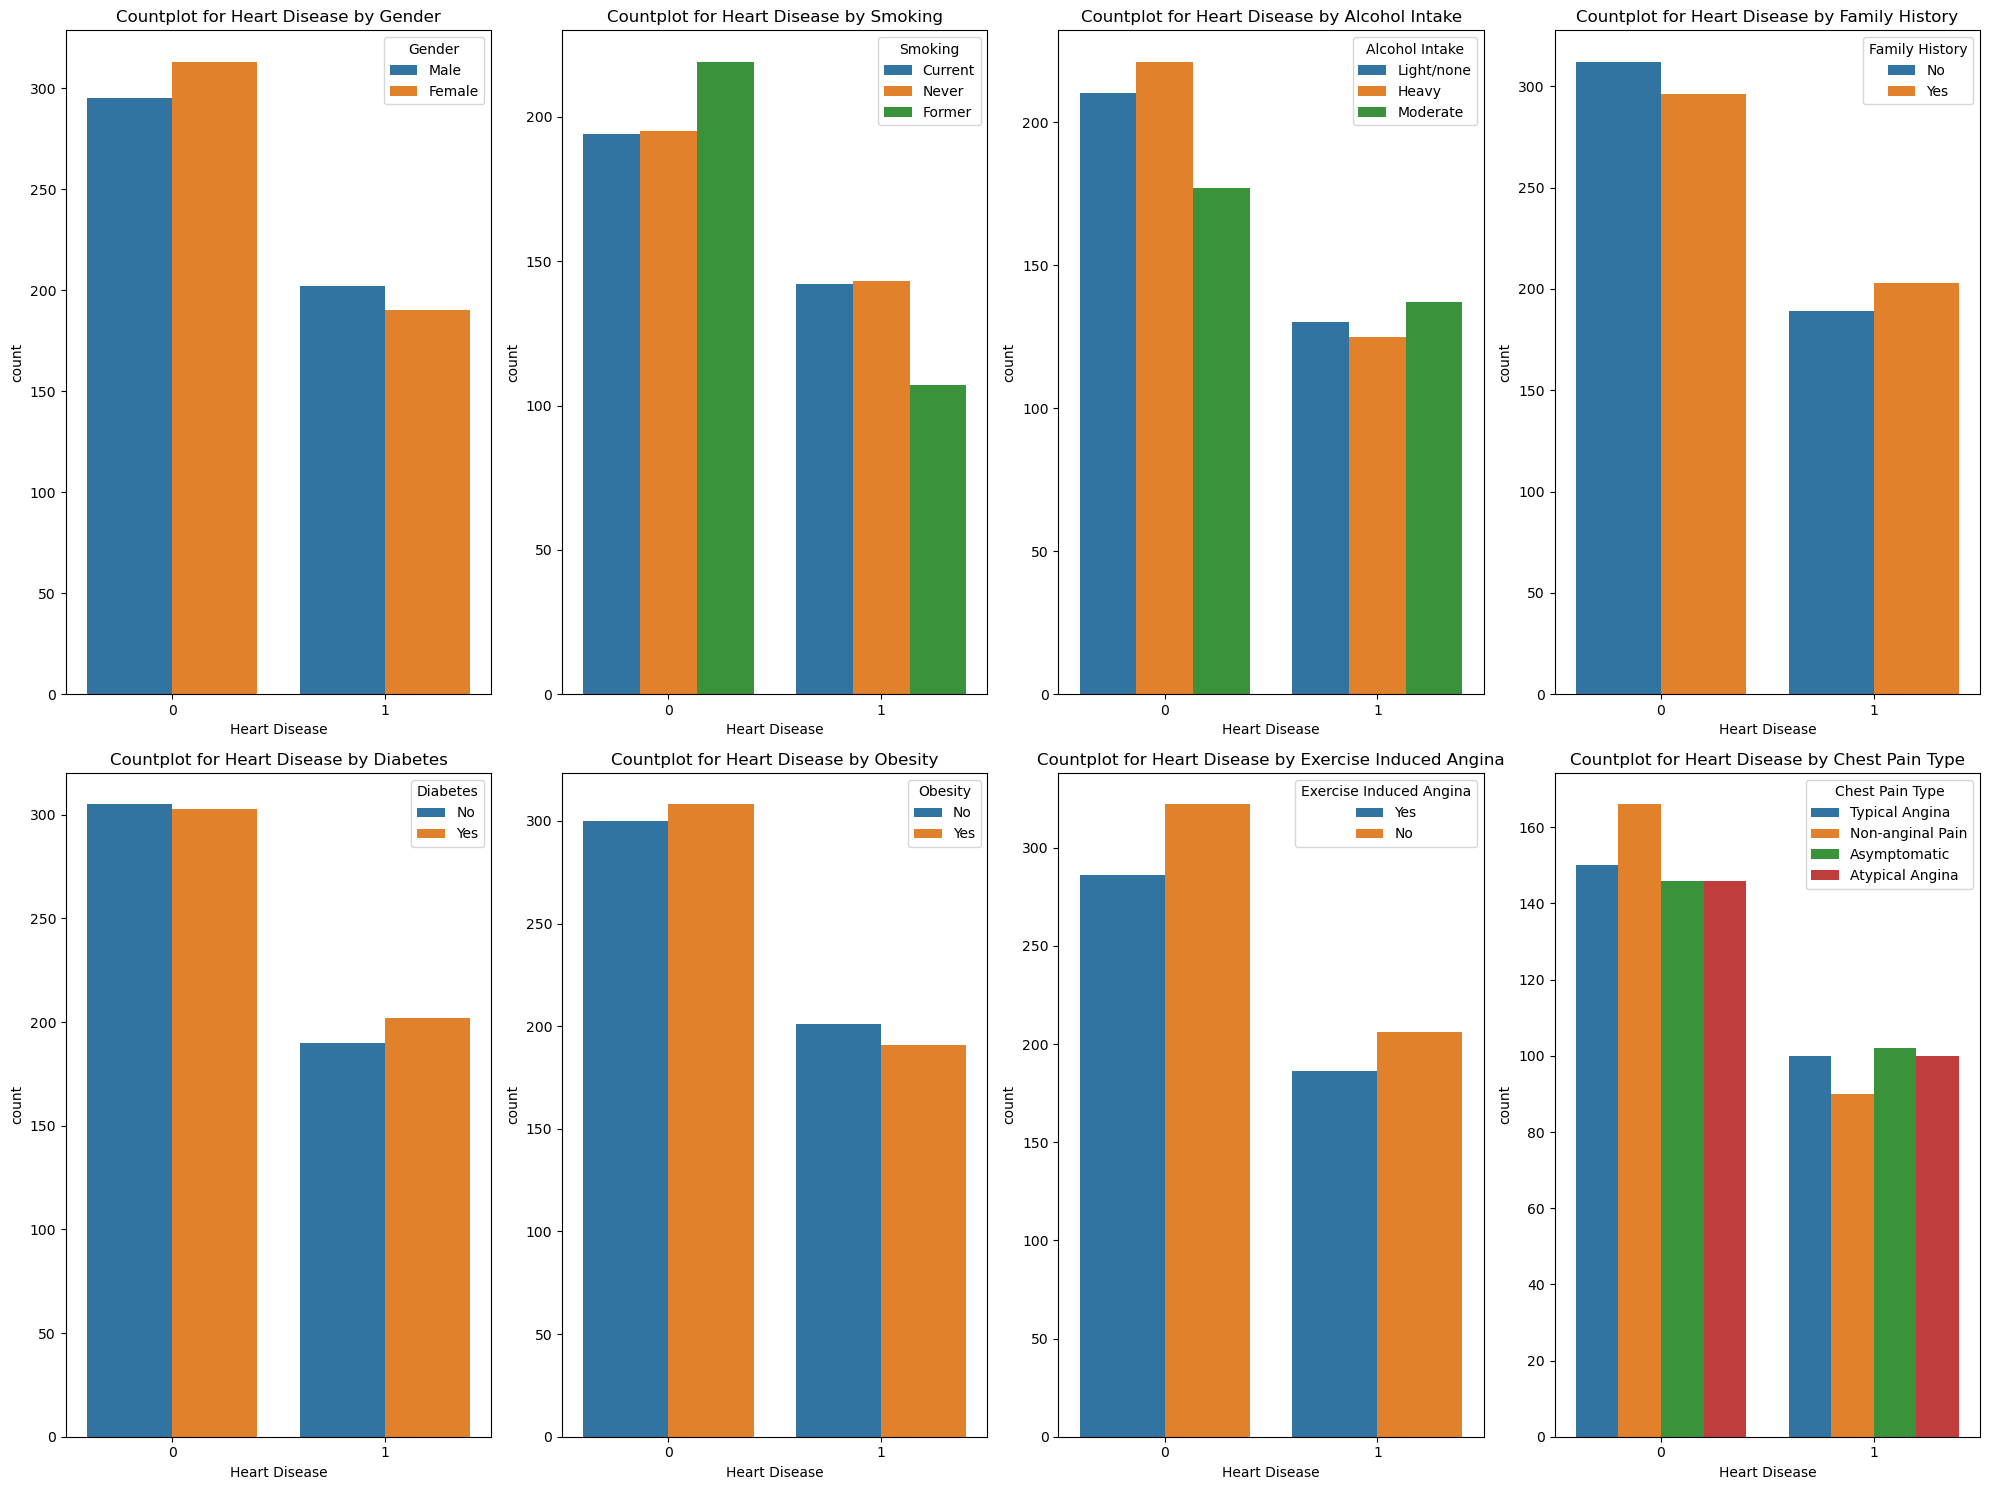

In [383]:
n_row=2
n_col=4
fig, axs = plt.subplots(n_row, n_col, figsize=(20,15))  # Create a 2x4 grid of subplots

for ax, col in zip(axs.flatten(), cat_cols):
    cat_graphs(ax, col)

plt.tight_layout()
plt.show()

From the previous plots we can gather: 
1. Males have a higher risk of heart disease.
2. Those whom have family history of heart disease are at a higher risk.
3. Individuals with diabetes are more likely to have heart disease.
4. Those who get 'Angina' because of exercising are more likely to have heart disease.

In [384]:
#Now let's explore our numerical columns.
#Grouping the columns 
numerical_cols = df.select_dtypes(include=['number']).columns
target_col = 'Heart Disease'  

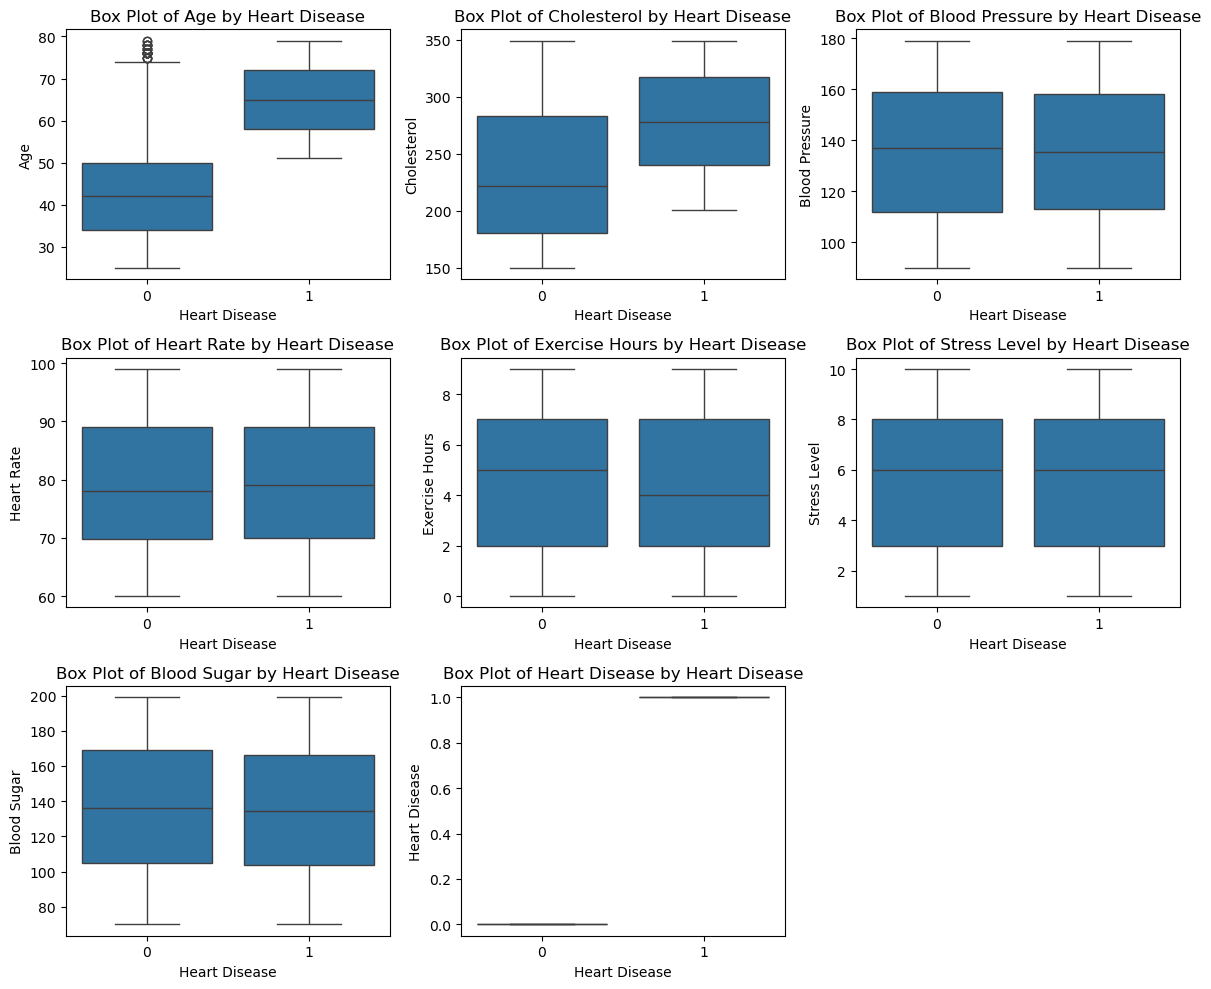

In [385]:
# Create a single figure for all boxplots
plt.figure(figsize=(12, 10))

# Plot all boxplots in a single plot using subplots
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid of plots
    sns.boxplot(data=df, x=target_col, y=col)
    plt.title(f"Box Plot of {col} by {target_col}")
    plt.xlabel(target_col)
    plt.ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

From the plots we can gather that: 
1. Individuals aged 60 and above are at a higher risk of heart disease.
2. Those with a high cholestorl level of 250 and above are more likely to have heart disease.

In [386]:
# Before building the models, let's prepare the data by normalizing and scaling it.
#I also want to see the correlation between the featues which I will use a heatmap for. 

# *Data Preparing*

In [387]:
#Label encoding of binary columns
binary_columns = ['Gender', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina']
for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [388]:
# One-hot encoding of multiclass columns
df = pd.get_dummies(df, columns=['Smoking', 'Chest Pain Type', 'Alcohol Intake'], drop_first=True)

In [389]:
# Normalizing numerical features to ensure fairness across all features and have them all at a similar scale
numerical_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

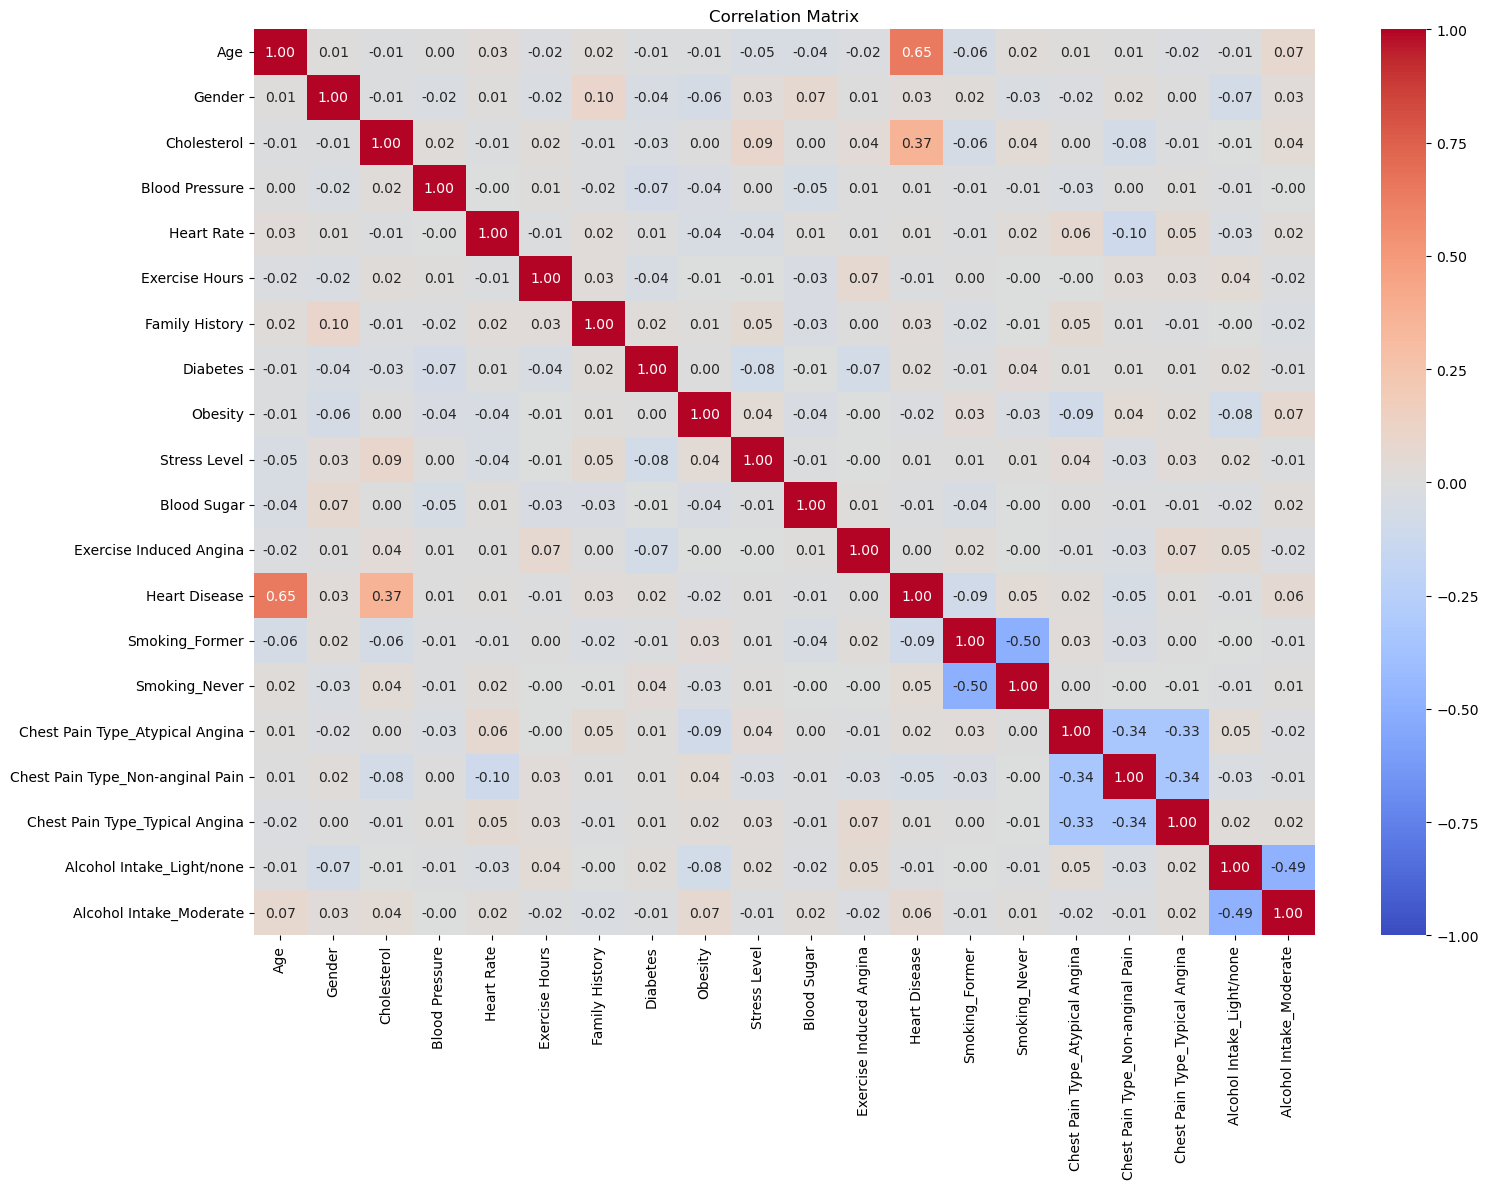

In [390]:
# Creating a heatmap to visualize the correlations among variables
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

From the correlation heatmap we can see that the features with the most relation to heart disease include 'Age' and Cholesterol'.

# *Modelling*

### Spliting the data into training and testing sets

In [391]:
X = df.drop(columns=['Heart Disease']) 
y = df['Heart Disease'] #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80% of the data will be trained on.
#20% of the data will be tested on

In [392]:
#Making a dataframe to display iterations.
scores = pd.DataFrame(columns=['Model', 'Accuracy'])
scores

,Model,Accuracy


## *Logistic Regression* 

### Training the model

In [393]:
LR = LogisticRegression(penalty = 'l2', C=100,  class_weight={0: 0.9, 1: 0.1}, random_state=None)
LR.fit(X_train,y_train)

LogisticRegression(C=100, class_weight={0: 0.9, 1: 0.1})

### Predicitions and evalutaions

In [394]:
#Predict
y_predLR = LR.predict(X_test)

Accuracy: 0.825


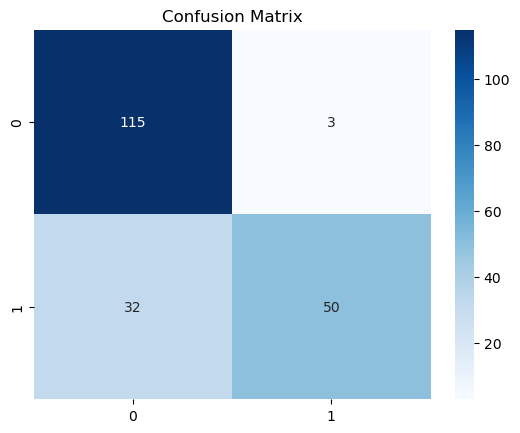

In [395]:
#Evaluating the model
LR_accuracy = accuracy_score(y_test, y_predLR)
print("Accuracy:", LR_accuracy) 

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predLR), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [396]:
#Evalutaing the model using thr f1-score, recall, precision and accuracy. 
#Classification_report 
print(classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       118
           1       0.94      0.61      0.74        82

    accuracy                           0.82       200
   macro avg       0.86      0.79      0.80       200
weighted avg       0.85      0.82      0.82       200



In [397]:
scores.loc[len(scores)] = ['Logistic Regression', LR_accuracy]
scores

,Model,Accuracy
0,Logistic Regression,0.825


### Logisitic Regression with Gridsearch

In [398]:
#Applying grid search
#The hyperparameters used:
#Max iterations
#class_weight 
#C
params = {
    'C': [0.01, 0.1, 1],
    'class_weight': ['balanced', None],
    'random_state': [10, None],
    'penalty':['l2']
}
grid_search = GridSearchCV(estimator=LR, param_grid=params, cv=4, scoring='accuracy',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(C=100, class_weight={0: 0.9, 1: 0.1}),
             param_grid={'C': [0.01, 0.1, 1],
                         'class_weight': ['balanced', None], 'penalty': ['l2'],
                         'random_state': [10, None]},
             return_train_score=True, scoring='accuracy')

In [399]:
# Get the index of the best model
best_index = grid_search.best_index_
# Retrieve the training score for the best combination of hyperparameters
best_train_score = grid_search.cv_results_['mean_train_score'][best_index]
# Print the best training score
print(f"Training Score for the Best Model: {best_train_score}")

Training Score for the Best Model: 0.8691666666666666


In [400]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters, best score (validation), and training scores
print(f"Best Parameters: {best_params}")
print(f"Best Validation Score (Best Score): {best_score}")

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'random_state': 10}
Best Validation Score (Best Score): 0.8675


In [401]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_C','param_penalty','param_random_state','mean_test_score','param_class_weight',
                   'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
results

,param_C,param_penalty,param_random_state,mean_test_score,param_class_weight,std_test_score,rank_test_score
6,0.10,l2,10,0.86750,None,0.013463,1
7,0.10,l2,None,0.86750,None,0.013463,1
10,1.00,l2,10,0.86000,None,0.018371,3
11,1.00,l2,None,0.86000,None,0.018371,3
0,0.01,l2,10,0.85875,balanced,0.026309,5
1,0.01,l2,None,0.85875,balanced,0.026309,5
2,0.01,l2,10,0.85500,None,0.017678,7
3,0.01,l2,None,0.85500,None,0.017678,7
4,0.10,l2,10,0.85375,balanced,0.034709,9
5,0.10,l2,None,0.85375,balanced,0.034709,9


In [402]:
y_pred = grid_search.predict(X_test)

Accuracy: 0.865


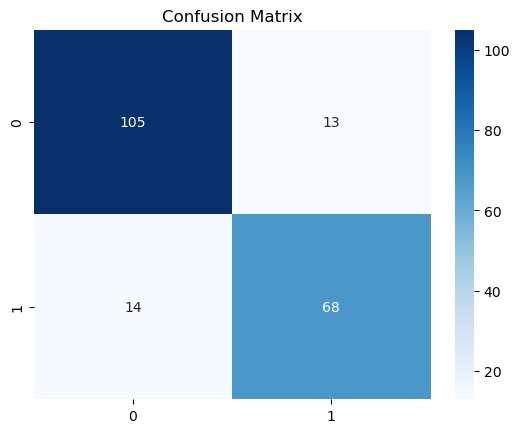

In [403]:
# Confusion matrix
LR_accuracy_grid = accuracy_score(y_test, y_pred)
print("Accuracy:",LR_accuracy_grid )
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [404]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       118
           1       0.84      0.83      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [405]:
scores.loc[len(scores)] = ['Logistic Regression with Gridsearch', LR_accuracy_grid]
scores

,Model,Accuracy
0,Logistic Regression,0.825
1,Logistic Regression with Gridsearch,0.865


## *Support Vector Machines (SVC)* 

### Training the model

In [406]:
#train the model
svc = SVC (C=0.1,kernel='linear', class_weight= 'balanced',random_state=42)
svc.fit(X_train, y_train)

SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=42)

### Predictions and Evaluations

In [407]:
#Predict
y_pred = svc.predict(X_test)

Accuracy: 0.87


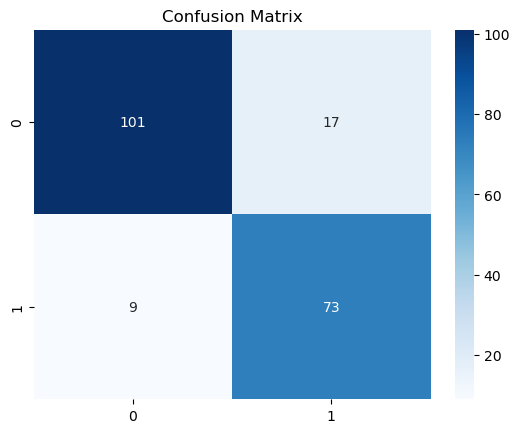

In [408]:
#Evaluating the model
accuracy_svc= accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_svc) 

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [409]:
#Evalutaing the model using thr f1-score, recall, precision and accuracy. 
#Classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       118
           1       0.81      0.89      0.85        82

    accuracy                           0.87       200
   macro avg       0.86      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [410]:
scores.loc[len(scores)] = ['SVC', accuracy_svc]
scores

,Model,Accuracy
0,Logistic Regression,0.825
1,Logistic Regression with Gridsearch,0.865
2,SVC,0.870


### SVC with Gridsearch

In [411]:
#Applying gridsearch
#C
#class_weight 
params = { 'C': [10,100,1000, 1,0.1], 'class_weight': ['balanced',None], 'random_state':[None, 42],'kernel':['linear','rbf']}
grid_search = GridSearchCV(estimator=svc, param_grid=params, cv=4, scoring='accuracy',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=SVC(C=0.1, class_weight='balanced', kernel='linear',
                           random_state=42),
             param_grid={'C': [10, 100, 1000, 1, 0.1],
                         'class_weight': ['balanced', None],
                         'kernel': ['linear', 'rbf'],
                         'random_state': [None, 42]},
             return_train_score=True, scoring='accuracy')

In [412]:
# Get the index of the best model
best_index = grid_search.best_index_
# Retrieve the training score for the best combination of hyperparameters
best_train_score = grid_search.cv_results_['mean_train_score'][best_index]
# Print the best training score
print(f"Training Score for the Best Model: {best_train_score}")

Training Score for the Best Model: 0.9762500000000001


In [413]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Validation Score (Best Score): {best_score}")

Best Parameters: {'C': 1, 'class_weight': None, 'kernel': 'rbf', 'random_state': None}
Best Validation Score (Best Score): 0.9225


In [414]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_C','param_kernel','param_random_state','param_class_weight',
                   'std_test_score','mean_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
results

,param_C,param_kernel,param_random_state,param_class_weight,std_test_score,mean_test_score,rank_test_score
31,1.0,rbf,42,None,0.023585,0.92250,1
30,1.0,rbf,None,None,0.023585,0.92250,1
19,1000.0,rbf,42,balanced,0.007500,0.91250,3
14,100.0,rbf,None,None,0.007500,0.91250,3
22,1000.0,rbf,None,None,0.007500,0.91250,3
11,100.0,rbf,42,balanced,0.007500,0.91250,3
10,100.0,rbf,None,balanced,0.007500,0.91250,3
23,1000.0,rbf,42,None,0.007500,0.91250,3
18,1000.0,rbf,None,balanced,0.007500,0.91250,3
7,10.0,rbf,42,None,0.007500,0.91250,3


In [415]:
y_pred = grid_search.predict(X_test)

Accuracy: 0.935


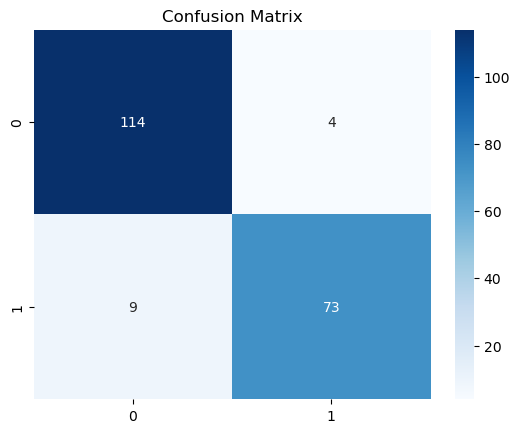

In [416]:
# Confusion matrix
accuracy_svc_grid = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svc_grid)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [417]:
scores.loc[len(scores)] = ['SVC with GridSearch', accuracy_svc_grid]
scores

,Model,Accuracy
0,Logistic Regression,0.825
1,Logistic Regression with Gridsearch,0.865
2,SVC,0.870
3,SVC with GridSearch,0.935


## *Decision Tree*

### Training the model

In [418]:
DT = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=7, max_features=7, random_state=42)
#Training the model
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=7,
                       random_state=42, splitter='random')

### Predictions and Evaluations

In [419]:
#Prediciting 
y_pred = DT.predict(X_test)

Accuracy: 0.76


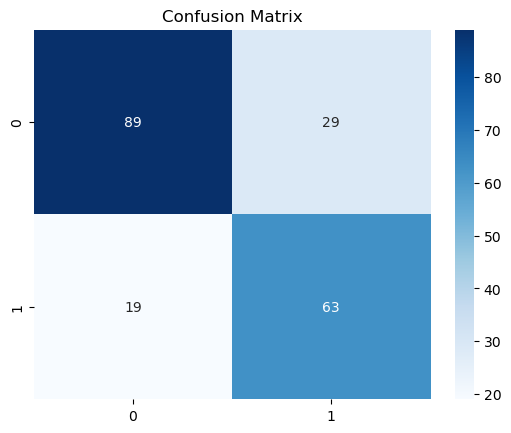

In [420]:
#Evaluating the model
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_dt) 

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [421]:
#Evalutaing the model using thr f1-score, recall, precision and accuracy. 
#Classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       118
           1       0.68      0.77      0.72        82

    accuracy                           0.76       200
   macro avg       0.75      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200



In [422]:
scores.loc[len(scores)] = ['Decision Tree', accuracy_dt]
scores

,Model,Accuracy
0,Logistic Regression,0.825
1,Logistic Regression with Gridsearch,0.865
2,SVC,0.870
3,SVC with GridSearch,0.935
4,Decision Tree,0.760


### DT with Gridsearch

In [423]:
#Applying gridsearch
#C
#class_weight 
params = { 'criterion': ['gini','entropy','log_loss'], 'splitter': ['best','random'],'max_depth' :[7,10,5, None],
         'max_features' : [3,5,7,None]}
grid_search = GridSearchCV(estimator=DT, param_grid=params, cv=4, scoring='accuracy',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                              max_features=7, random_state=42,
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 10, 5, None],
                         'max_features': [3, 5, 7, None],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [424]:
best_index = grid_search.best_index_
best_train_score = grid_search.cv_results_['mean_train_score'][best_index]
print(f"Training Score for the Best Model: {best_train_score}")

Training Score for the Best Model: 1.0


In [425]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'splitter': 'best'}
Best Score: 0.9975


In [426]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_criterion','param_splitter','param_max_depth','param_max_features',
                   'std_test_score','mean_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
results

,param_criterion,param_splitter,param_max_depth,param_max_features,std_test_score,mean_test_score,rank_test_score
22,gini,best,5,None,0.004330,0.99750,1
86,log_loss,best,5,None,0.004330,0.99750,1
38,entropy,best,7,None,0.004330,0.99750,1
78,log_loss,best,10,None,0.004330,0.99750,1
70,log_loss,best,7,None,0.004330,0.99750,1
...,...,...,...,...,...,...,...
17,gini,random,5,3,0.041136,0.64625,92
73,log_loss,random,10,3,0.047087,0.64125,93
41,entropy,random,10,3,0.047087,0.64125,93
49,entropy,random,5,3,0.057920,0.63625,95


In [427]:
y_pred = grid_search.predict(X_test)

Accuracy: 1.0


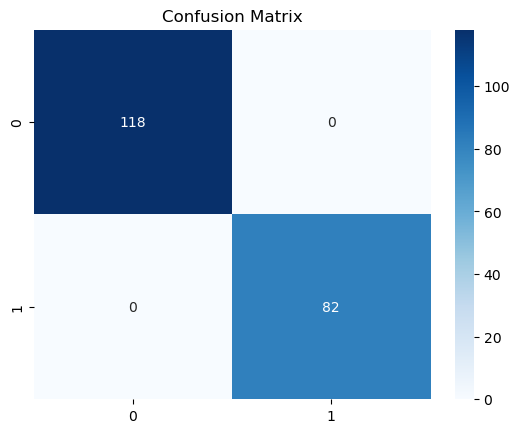

In [428]:
# Confusion matrix
accuracy_dt_grid = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_dt_grid)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [429]:
scores.loc[len(scores)] = ['Decision Tree with GridSearch', accuracy_dt_grid]
scores

,Model,Accuracy
0,Logistic Regression,0.825
1,Logistic Regression with Gridsearch,0.865
2,SVC,0.870
3,SVC with GridSearch,0.935
4,Decision Tree,0.760
5,Decision Tree with GridSearch,1.000


## *Random Forest Classifier* 

### Training the model 

In [430]:
RF = RandomForestClassifier(n_estimators=10, max_features=3,max_depth=5,random_state=None,criterion = 'entropy')
#Training 
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=3,
                       n_estimators=10)

### Predicitios and Evalutaions

In [431]:
#Predicting 
y_pred = RF.predict(X_test)

Accuracy: 0.99


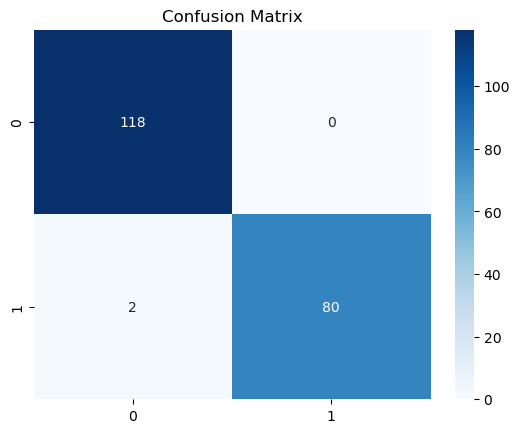

In [432]:
#Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [433]:
#Evalutaing the model using thr f1-score, recall, precision and accuracy. 
#Classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.98      0.99        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [434]:
scores.loc[len(scores)] = ['Random Forest', accuracy_rf]
scores

,Model,Accuracy
0,Logistic Regression,0.825
1,Logistic Regression with Gridsearch,0.865
2,SVC,0.870
3,SVC with GridSearch,0.935
4,Decision Tree,0.760
5,Decision Tree with GridSearch,1.000
6,Random Forest,0.990


### RF with Gridsearch

In [435]:
#Applying gridsearch
#C
#class_weight 
params = { 'criterion': ['gini','entropy','log_loss'],'max_depth' :[7,10,5, None],
         'max_features' : [7,'sqrt','log2',None], 'random_state':[42, None]}
grid_search = GridSearchCV(estimator=RF, param_grid=params, cv=4, scoring='accuracy',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=5,
                                              max_features=3, n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 10, 5, None],
                         'max_features': [7, 'sqrt', 'log2', None],
                         'random_state': [42, None]},
             return_train_score=True, scoring='accuracy')

In [436]:
best_index = grid_search.best_index_
best_train_score = grid_search.cv_results_['mean_train_score'][best_index]
print(f"Training Score for the Best Model: {best_train_score}")

Training Score for the Best Model: 1.0


In [437]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 7, 'random_state': 42}
Best Score: 1.0


In [438]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_criterion', 'param_max_depth', 'param_max_features', 'param_random_state',
                         'mean_train_score', 'std_train_score', 'mean_test_score', 
                         'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
results

,param_criterion,param_max_depth,param_max_features,param_random_state,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
73,log_loss,10,7,None,1.000000,0.000000,1.00000,0.000000,1
33,entropy,7,7,None,1.000000,0.000000,1.00000,0.000000,1
16,gini,5,7,42,1.000000,0.000000,1.00000,0.000000,1
65,log_loss,7,7,None,1.000000,0.000000,1.00000,0.000000,1
41,entropy,10,7,None,1.000000,0.000000,1.00000,0.000000,1
...,...,...,...,...,...,...,...,...,...
10,gini,10,sqrt,42,0.999583,0.000722,0.97500,0.015411,91
26,gini,None,sqrt,42,0.999583,0.000722,0.97250,0.004330,93
28,gini,None,log2,42,0.999583,0.000722,0.97250,0.004330,93
18,gini,5,sqrt,42,0.991667,0.005270,0.97125,0.012930,95


In [439]:
y_pred = grid_search.predict(X_test)

Accuracy: 1.0


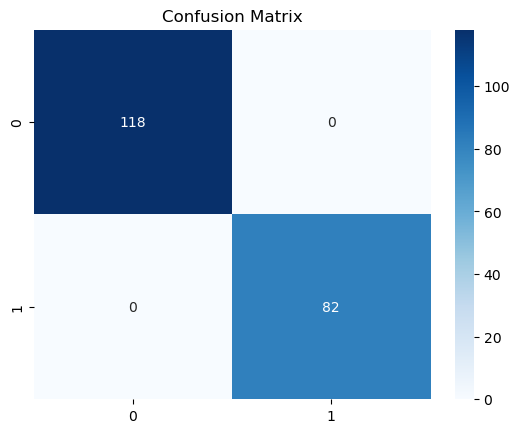

In [440]:
# Confusion matrix
accuracy_rf_grid = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_grid )
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [441]:
scores.loc[len(scores)] = ['Random Forest with GridSearch', accuracy_rf_grid ]
scores

,Model,Accuracy
0,Logistic Regression,0.825
1,Logistic Regression with Gridsearch,0.865
2,SVC,0.870
3,SVC with GridSearch,0.935
4,Decision Tree,0.760
5,Decision Tree with GridSearch,1.000
6,Random Forest,0.990
7,Random Forest with GridSearch,1.000


## *XGB Classifier*

### Training the model 

In [442]:
xgb = XGBClassifier(scale_pos_weight=0.5,max_depth=7,n_estimators=39, learning_rate= 0.01)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=39, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Predicitios and Evalutaions

In [443]:
y_pred = xgb.predict(X_test)

Accuracy: 0.59


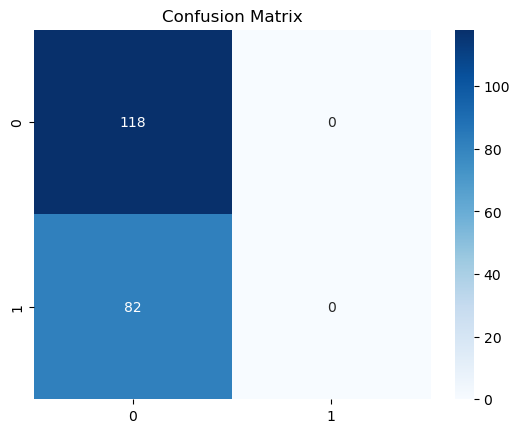

In [444]:
#Evaluating the model
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_xgb)

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [445]:
#Evalutaing the model using thr f1-score, recall, precision and accuracy. 
#Classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       118
           1       0.00      0.00      0.00        82

    accuracy                           0.59       200
   macro avg       0.29      0.50      0.37       200
weighted avg       0.35      0.59      0.44       200



C:\Users\ramam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ramam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ramam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [446]:
scores.loc[len(scores)] = ['XGB Classifier', accuracy_xgb ]
scores

,Model,Accuracy
0,Logistic Regression,0.825
1,Logistic Regression with Gridsearch,0.865
2,SVC,0.870
3,SVC with GridSearch,0.935
4,Decision Tree,0.760
5,Decision Tree with GridSearch,1.000
6,Random Forest,0.990
7,Random Forest with GridSearch,1.000
8,XGB Classifier,0.590


### XGB with Gridsearch

In [447]:
params = { 'learning_rate': [0.01, 0.1, 0.05], 'max_depth': [3, 5, 7], 'n_estimators': [100, 200], 'scale_pos_weight':[2,1,5]}
grid_search = GridSearchCV(estimator=xgb, param_grid=params, cv=4, scoring='accuracy',return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=39,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'scale_pos_weight': [2, 1, 5]},
             return_train_score=True, scoring='accuracy')

In [448]:
best_index = grid_search.best_index_
best_train_score = grid_search.cv_results_['mean_train_score'][best_index]
print(f"Training Score for the Best Model: {best_train_score}")

Training Score for the Best Model: 1.0


In [449]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 2}
Best Score: 1.0


In [450]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_scale_pos_weight', 
                   'mean_train_score', 'std_train_score', 'mean_test_score', 
                   'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
results

,param_learning_rate,param_max_depth,param_n_estimators,param_scale_pos_weight,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
0,0.01,3,100,2,1.0,0.0,1.0,0.0,1
29,0.10,5,200,5,1.0,0.0,1.0,0.0,1
30,0.10,7,100,2,1.0,0.0,1.0,0.0,1
31,0.10,7,100,1,1.0,0.0,1.0,0.0,1
32,0.10,7,100,5,1.0,0.0,1.0,0.0,1
33,0.10,7,200,2,1.0,0.0,1.0,0.0,1
34,0.10,7,200,1,1.0,0.0,1.0,0.0,1
35,0.10,7,200,5,1.0,0.0,1.0,0.0,1
36,0.05,3,100,2,1.0,0.0,1.0,0.0,1
37,0.05,3,100,1,1.0,0.0,1.0,0.0,1


In [451]:
y_pred = grid_search.predict(X_test)

Accuracy: 1.0


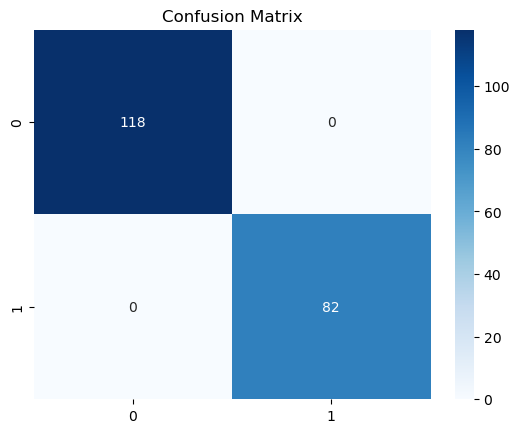

In [452]:
# Confusion matrix
accuracy_xgb_grid = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgb_grid)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [453]:
scores.loc[len(scores)] = ['XGB Classifier with GridSearch',accuracy_xgb_grid]
scores

,Model,Accuracy
0,Logistic Regression,0.825
1,Logistic Regression with Gridsearch,0.865
2,SVC,0.870
3,SVC with GridSearch,0.935
4,Decision Tree,0.760
5,Decision Tree with GridSearch,1.000
6,Random Forest,0.990
7,Random Forest with GridSearch,1.000
8,XGB Classifier,0.590
9,XGB Classifier with GridSearch,1.000
